In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
%pip install seaborn
%pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# import pandas as pd
# import numpy as np
# import re
# import nltk
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.manifold import TSNE
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import gensim

# # Download stopwords
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# # Load the datasets
# true_news = pd.read_csv('True.csv')
# fake_news = pd.read_csv('Fake.csv')

# # Add labels
# true_news['label'] = 1
# fake_news['label'] = 0

# # Concatenate the datasets
# data = pd.concat([true_news, fake_news], ignore_index=True)

# # Shuffle the data
# data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# # Preprocessing: remove unnecessary columns (date, subject)
# data = data.drop(['date', 'subject'], axis=1)

# # Function to clean text
# def preprocess_text(text):
#     text = text.lower()  # Lowercase
#     text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
#     stop_words = set(stopwords.words('english'))
#     text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
#     return text

# # Apply preprocessing to title and text
# data['title'] = data['title'].apply(preprocess_text)
# data['text'] = data['text'].apply(preprocess_text)

# # Create 'combined_text' by concatenating title and text
# data['combined_text'] = data['title'] + ' ' + data['text']

# # Tokenization settings
# max_words = 10000  # Limit vocabulary size
# tokenizer = Tokenizer(num_words=max_words)

# # Fit the tokenizer on combined text and convert it to sequences
# tokenizer.fit_on_texts(data['combined_text'])
# sequences = tokenizer.texts_to_sequences(data['combined_text'])

# # Visualize the distribution of token lengths
# token_lengths = [len(seq) for seq in sequences]
# plt.hist(token_lengths, bins=50, color='blue', edgecolor='black')
# plt.title('Distribution of Token Lengths')
# plt.xlabel('Token Length')
# plt.ylabel('Frequency')
# plt.show()

# # Set max_len for padding
# max_len = 500  # You can adjust this based on the token length distribution

# # Pad the sequences
# padded_sequences = pad_sequences(sequences, maxlen=max_len)

# # Visualize the first 5 padded sequences as a heatmap
# plt.figure(figsize=(10, 5))
# sns.heatmap(padded_sequences[:5], cmap='Blues', annot=False, cbar=False)
# plt.title('Padded Sequences Heatmap (First 5 Sequences)')
# plt.show()

# # Load the pre-trained Google Word2Vec model (ensure you have the GoogleNews-vectors-negative300.bin)
# word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# # Prepare the embedding matrix
# embedding_dim = 300  # Google Word2Vec model has 300-dimensional embeddings
# embedding_matrix = np.zeros((max_words, embedding_dim))

# # Map the words from tokenizer's vocabulary to Word2Vec embeddings
# for word, i in tokenizer.word_index.items():
#     if i < max_words:
#         try:
#             embedding_vector = word2vec_model[word]
#             if embedding_vector is not None:
#                 embedding_matrix[i] = embedding_vector
#         except KeyError:
#             # Word not found in Word2Vec, leave the embedding as all zeros
#             pass

# # Use t-SNE to visualize embeddings in 2D
# tsne = TSNE(n_components=2, random_state=42)
# embedding_2d = tsne.fit_transform(embedding_matrix[:500])  # Visualizing the first 500 words

# # Plot t-SNE result
# plt.figure(figsize=(10, 6))
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c='blue', edgecolors='k', s=50)
# plt.title('Word Embeddings Visualized using t-SNE')
# plt.show()


In [5]:
# 

In [6]:
%pip install imblearn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim

In [8]:

# Load the datasets
true_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

# Add labels
true_news['label'] = 1
fake_news['label'] = 0
print(true_news.head())
print(fake_news.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1  
                                               title  \


In [9]:
# Concatenate the datasets
data = pd.concat([true_news, fake_news], ignore_index=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


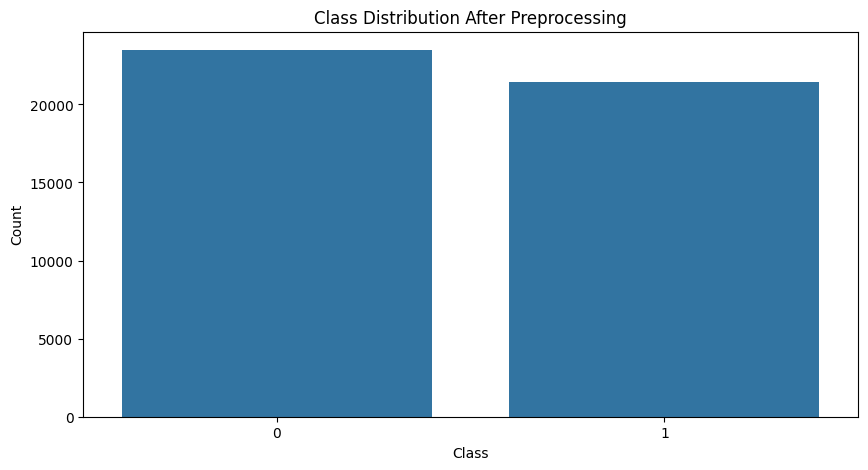

In [10]:
# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop unnecessary columns
data = data.drop(['date', 'subject'], axis=1)

# Function to clean text
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    return text

# Apply preprocessing to title and text
data['title'] = data['title'].apply(preprocess_text)
data['text'] = data['text'].apply(preprocess_text)

# Create 'combined_text'
data['combined_text'] = data['title'] + ' ' + data['text']

# Visualize class distribution after preprocessing
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data)
plt.title('Class Distribution After Preprocessing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Vocabulary size: 217676
Example tokenized sequence: [1225, 431, 592, 3540, 21, 42, 457, 1984, 14, 1323, 1704, 69, 14, 10, 84, 67, 11, 6, 2116, 5, 32, 28, 349, 2, 1242, 15, 63, 40, 148, 1076, 28, 5368, 20, 1, 1680, 5, 32, 2579, 2, 4326, 7, 64, 28, 1076, 2296, 57, 3, 26, 2, 93, 15, 10, 598, 94, 48, 4, 4436, 325, 1, 1343, 3686, 345, 56, 6063, 5, 15, 788, 7, 64, 28, 100, 6, 1, 567, 168, 3540, 29, 1902, 1, 150, 1700, 225, 11, 1808, 63, 12, 11, 100, 2321, 7, 69, 14, 1323, 5, 105, 14, 92, 1408, 583, 1849, 2951, 116, 19, 225, 1253, 1, 100, 4672, 6783, 250, 159, 69, 14, 5, 1, 6783, 193, 835, 29, 1282, 6490, 8, 152, 142, 428, 107, 71, 6, 289, 26, 279, 11, 547, 188, 100, 26, 1527, 4832, 4, 417, 5481, 2, 443, 14, 123, 5216, 7, 32, 110, 24, 722, 481, 1290, 996, 1442, 143, 95, 2929, 506, 1, 289, 7, 15, 788, 7, 26, 788, 2, 22, 58, 14, 10, 84, 67, 11, 6112, 1, 78, 2, 935, 2, 90, 18, 35, 11, 1, 747, 1253, 3540, 10, 491, 29, 1334, 7, 237, 3540, 5, 1, 1221, 3, 1, 150, 28, 24, 811, 38, 26, 104, 620, 2, 37

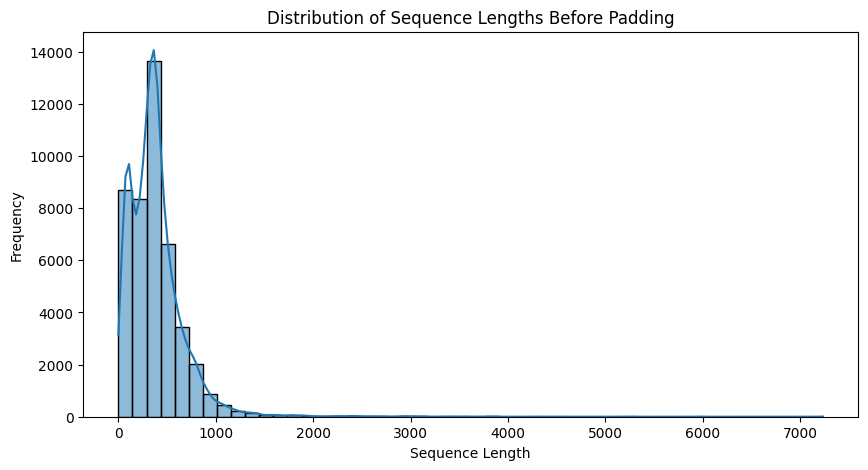

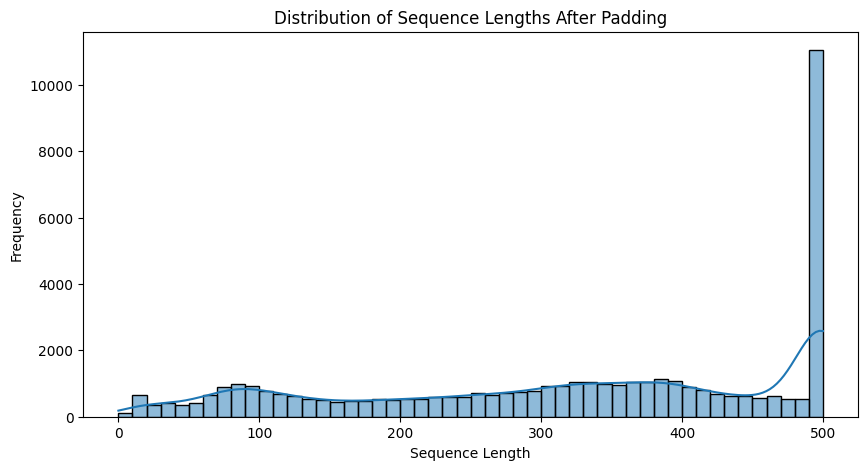

In [11]:
# Tokenization settings
max_words = 10000  # Limit vocabulary size
tokenizer = Tokenizer(num_words=max_words)

# Fit the tokenizer on combined text and convert it to sequences
tokenizer.fit_on_texts(data['combined_text'])
sequences = tokenizer.texts_to_sequences(data['combined_text'])

# Visualize tokenizer results
word_index = tokenizer.word_index
print(f"Vocabulary size: {len(word_index)}")

# Example of tokenized sequences
print(f"Example tokenized sequence: {sequences[0]}")

# Pad the sequences
max_len = 500  # Adjust based on your distribution
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Visualize the padded sequences
print(f"Padded sequences shape: {padded_sequences.shape}")

# Plot distribution of sequence lengths
plt.figure(figsize=(10, 5))
sequence_lengths = [len(seq) for seq in sequences]
sns.histplot(sequence_lengths, bins=50, kde=True)
plt.title('Distribution of Sequence Lengths Before Padding')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
padded_sequence_lengths = np.sum(padded_sequences != 0, axis=1)
sns.histplot(padded_sequence_lengths, bins=50, kde=True)
plt.title('Distribution of Sequence Lengths After Padding')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

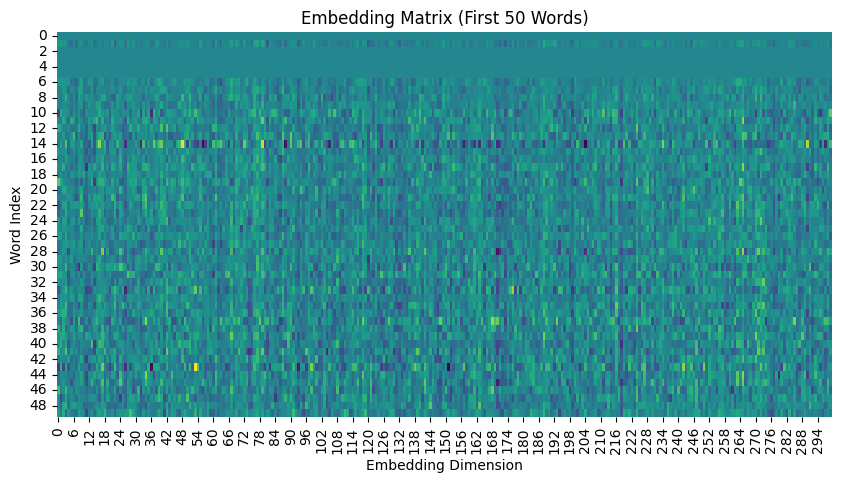

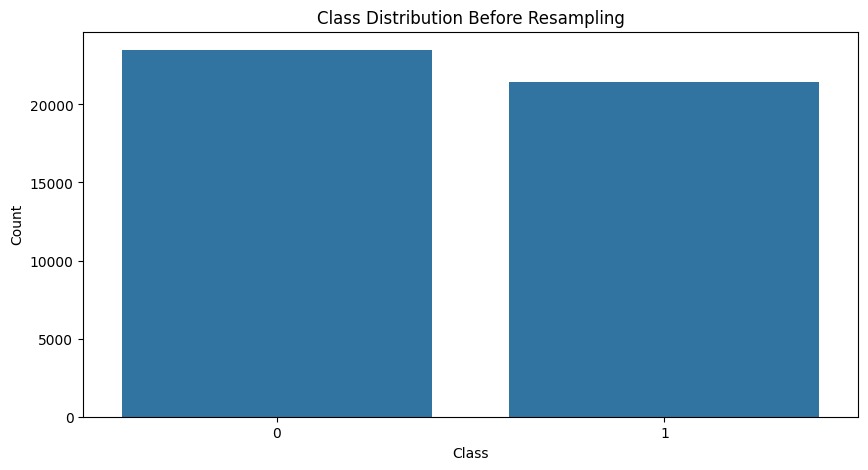

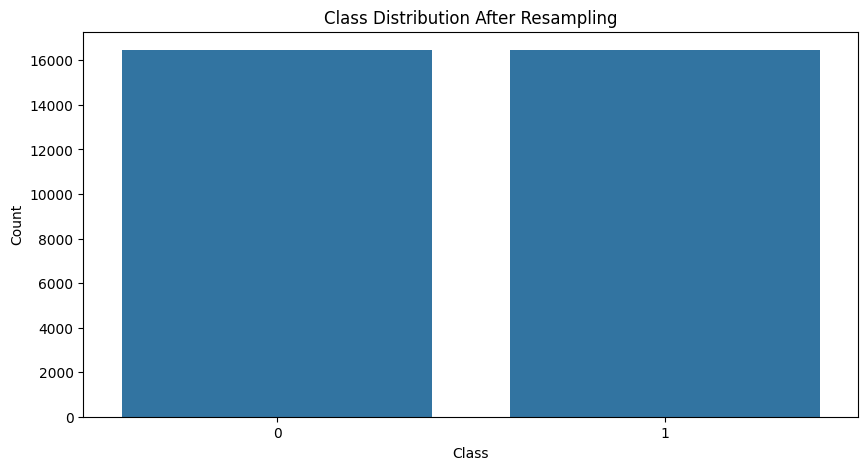

In [12]:

# Load Google Word2Vec model
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Create embedding matrix
embedding_dim = 300
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        try:
            embedding_vector = word2vec_model[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            # Word not in Word2Vec model
            continue

# Visualize the embedding matrix
plt.figure(figsize=(10, 5))
sns.heatmap(embedding_matrix[:50], cmap='viridis', cbar=False)
plt.title('Embedding Matrix (First 50 Words)')
plt.xlabel('Embedding Dimension')
plt.ylabel('Word Index')
plt.show()

# Check and visualize class distribution before resampling
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Split the data into features and labels
X = padded_sequences
y = data['label'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply resampling to the training set
smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualize class distribution after resampling
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [13]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import joblib
np.save('padded_sequences.npy', padded_sequences)
joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# Define the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False, input_length=max_len))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          3000000   
                                                                 
 bidirectional (Bidirectiona  (None, 500, 200)         320800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 500, 200)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the model
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=5,  # Adjust as needed
    batch_size=64,  # Adjust as needed
    validation_data=(X_test, y_test),
    callbacks=[checkpoint]
)


Epoch 1/5
515/515 [==============================] - 138s 268ms/step - loss: 0.0978 - accuracy: 0.9654 - val_loss: 0.0750 - val_accuracy: 0.9776
Epoch 2/5
515/515 [==============================] - 142s 275ms/step - loss: 0.0638 - accuracy: 0.9772 - val_loss: 0.0810 - val_accuracy: 0.9783
Epoch 3/5
515/515 [==============================] - 136s 264ms/step - loss: 0.0599 - accuracy: 0.9802 - val_loss: 0.0436 - val_accuracy: 0.9854
Epoch 4/5
515/515 [==============================] - 138s 268ms/step - loss: 0.0442 - accuracy: 0.9840 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 5/5
515/515 [==============================] - 135s 261ms/step - loss: 0.0495 - accuracy: 0.9825 - val_loss: 0.0246 - val_accuracy: 0.9927


In [18]:
# Load the best model
best_model = tf.keras.models.load_model('best_model.h5')

# Evaluate the model
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict on the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


421/421 [==============================] - 35s 80ms/step - loss: 0.0246 - accuracy: 0.9927
Test Loss: 0.02456250600516796
Test Accuracy: 0.992724597454071
421/421 [==============================] - 34s 79ms/step
Confusion Matrix:
[[6984   38]
 [  60 6388]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7022
           1       0.99      0.99      0.99      6448

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



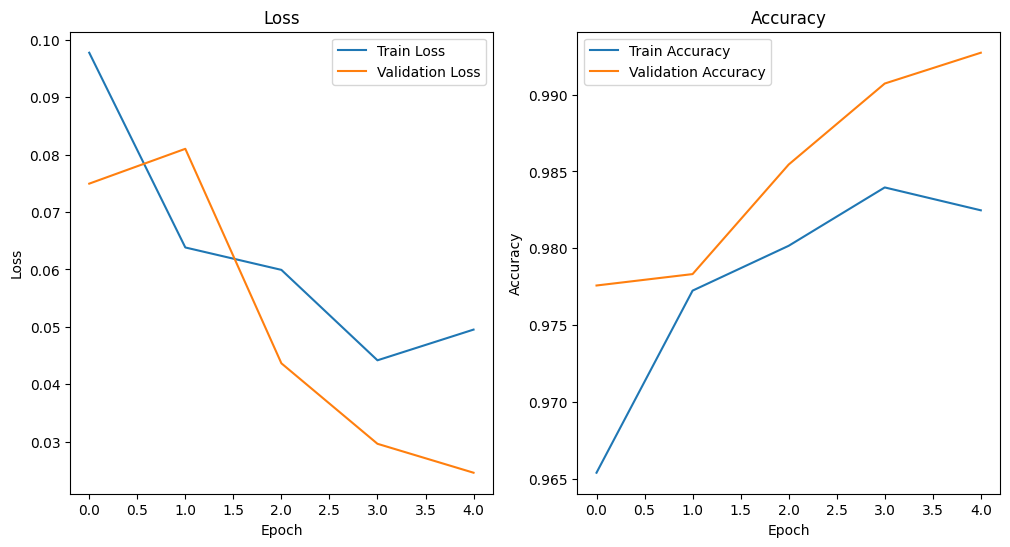

In [19]:
# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
